In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('geocoder_data.csv',index_col = 0)

In [5]:
df

,Unnamed: 0,url,seller_url,title,squares,full_price,price_per_square,floor,free,city,...,street,house_number,description,sub_near,highway_near,current_floor,max_floor,address,latitude,longitude
0,0,https://spb.cian.ru/sale/commercial/300074346/,https://www.cian.ru/company/83887466/,"Свободное назначение, 131,63 м²",131.63,41000000.0,311480.0,1 из 2,0,Санкт-Петербург,...,ул. Восстановления,19,Продажа помещения свободного назначения в бизн...,"[['Проспект Ветеранов', '25 мин.'], ['Ленински...","[['Нарва шоссе', '25 км от КАД'], ['Киевское ш...",1.0,2.0,"Санкт-Петербург, р-н Красносельский, мкр. Крас...",30.082621,59.724677
1,1,https://spb.cian.ru/sale/commercial/300073799/,https://spb.cian.ru/company/12477946,"Свободное назначение, 145,1 м²",145.10,37000000.0,254997.0,1 из 5,0,Санкт-Петербург,...,7-я Красноармейская ул.,5,"ID 6024 - пoжaлуйстa, coобщитe этот номер мeне...",[],[],1.0,5.0,"Санкт-Петербург, р-н Адмиралтейский, Измайловс...",30.316138,59.911854
2,2,https://spb.cian.ru/sale/commercial/300073275/,https://spb.cian.ru/company/59606612,"Свободное назначение, 73,5 м²",73.50,26000000.0,353742.0,1 из 7,0,Санкт-Петербург,...,11-я Красноармейская ул.,11,Код объекта: 1053925.\nПродается помещение пло...,"[['Балтийская', '10 мин.'], ['Фрунзенская', '1...",[],1.0,7.0,"Санкт-Петербург, р-н Адмиралтейский, Измайловс...",30.301127,59.912368
3,3,https://spb.cian.ru/sale/commercial/300070206/,NaN,"Свободное назначение, 682 м²",682.00,71500000.0,104839.0,1 из 2,0,Санкт-Петербург,...,ул. Коммуны,9к1,Новое здание Бизнес-Центра и профессиональный ...,"[['Проспект Большевиков', '9 мин.']]",[],1.0,2.0,"Санкт-Петербург, р-н Красногвардейский, Порохо...",30.506167,59.941687
4,5,https://spb.cian.ru/sale/commercial/300069782/,https://spb.cian.ru/company/74333292,"Торговая площадь, 33,9 м²",33.90,6441000.0,190000.0,1 из 9,0,Санкт-Петербург,...,ул. Лагоды,5,ВНИМАНИЕ! ЗАКРЫТАЯ ПРОДАЖА - ВСЕ ПОДРОБНОСТИ П...,"[['Ладожская', '6 мин.'], ['Новочеркасская', '...",[],1.0,9.0,"Санкт-Петербург, р-н Красногвардейский, Порохо...",30.449978,59.956836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,1342,https://spb.cian.ru/sale/commercial/295288773/,https://spb.cian.ru/company/28717,"Свободное назначение, 1 555 м²",1555.00,123000000.0,79100.0,3 из 3,0,Санкт-Петербург,...,Большая Озерная ул.,70Б,ЗВОНИТЕ! Всегда работаем с агентами и посредни...,"[['Проспект Просвещения', '6 мин.'], ['Удельна...",[],3.0,3.0,"Санкт-Петербург, р-н Выборгский, Шувалово-Озер...",0.000000,0.000000
1207,1343,https://spb.cian.ru/sale/commercial/295288770/,https://spb.cian.ru/company/28717,"Свободное назначение, 1 555 м²",1555.00,132175000.0,85000.0,3 из 3,0,Санкт-Петербург,...,Большая Озерная ул.,70Б,"Трехэтажное нежилое здание,возле Суздальских о...","[['Проспект Просвещения', '6 мин.'], ['Удельна...",[],3.0,3.0,"Санкт-Петербург, р-н Выборгский, Шувалово-Озер...",0.000000,0.000000
1208,1344,https://spb.cian.ru/sale/commercial/295280790/,NaN,"Свободное назначение, 45 м²",45.00,3800000.0,84445.0,-1 из 6,0,Санкт-Петербург,...,просп. Большой Петроградской стороны,28/1,Подвальное помещение без ремонта на 1ой линии ...,"[['Спортивная', '8 мин.'], ['Чкаловская', '8 м...",[],NaN,NaN,"Санкт-Петербург, р-н Петроградский, Петровский...",0.000000,0.000000
1209,1345,https://spb.cian.ru/sale/commercial/295279637/,NaN,"Арендный бизнес, 274,4 м²",274.40,43000000.0,156706.0,1,1,Санкт-Петербург,...,просп. Королева,64к1,"Продается арендный бизнес - помещение, располо...","[['Комендантский проспект', '6 мин.'], ['Удель...",[],1.0,1.0,"Санкт-Петербург, р-н Приморский, Коломяги, про...",0.000000,0.000000


In [9]:
df = df[['price_per_square','squares','full_price','free','current_floor','max_floor','latitude','longitude']]

In [10]:
df

,price_per_square,squares,full_price,free,current_floor,max_floor,latitude,longitude
0,311480.0,131.63,41000000.0,0,1.0,2.0,30.082621,59.724677
1,254997.0,145.10,37000000.0,0,1.0,5.0,30.316138,59.911854
2,353742.0,73.50,26000000.0,0,1.0,7.0,30.301127,59.912368
3,104839.0,682.00,71500000.0,0,1.0,2.0,30.506167,59.941687
4,190000.0,33.90,6441000.0,0,1.0,9.0,30.449978,59.956836
...,...,...,...,...,...,...,...,...
1206,79100.0,1555.00,123000000.0,0,3.0,3.0,0.000000,0.000000
1207,85000.0,1555.00,132175000.0,0,3.0,3.0,0.000000,0.000000
1208,84445.0,45.00,3800000.0,0,NaN,NaN,0.000000,0.000000
1209,156706.0,274.40,43000000.0,1,1.0,1.0,0.000000,0.000000


In [13]:
df = df[df['latitude'] != 0]

In [14]:
df

,price_per_square,squares,full_price,free,current_floor,max_floor,latitude,longitude
0,311480.0,131.63,41000000.0,0,1.0,2.0,30.082621,59.724677
1,254997.0,145.10,37000000.0,0,1.0,5.0,30.316138,59.911854
2,353742.0,73.50,26000000.0,0,1.0,7.0,30.301127,59.912368
3,104839.0,682.00,71500000.0,0,1.0,2.0,30.506167,59.941687
4,190000.0,33.90,6441000.0,0,1.0,9.0,30.449978,59.956836
...,...,...,...,...,...,...,...,...
895,319000.0,76.20,24307800.0,0,1.0,25.0,30.220961,59.862483
896,329000.0,72.50,23852500.0,0,1.0,25.0,30.220961,59.862483
897,380000.0,56.20,21356000.0,0,1.0,25.0,30.220961,59.862483
898,118368.0,49.00,5799999.0,0,1.0,5.0,30.382047,59.965912


In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

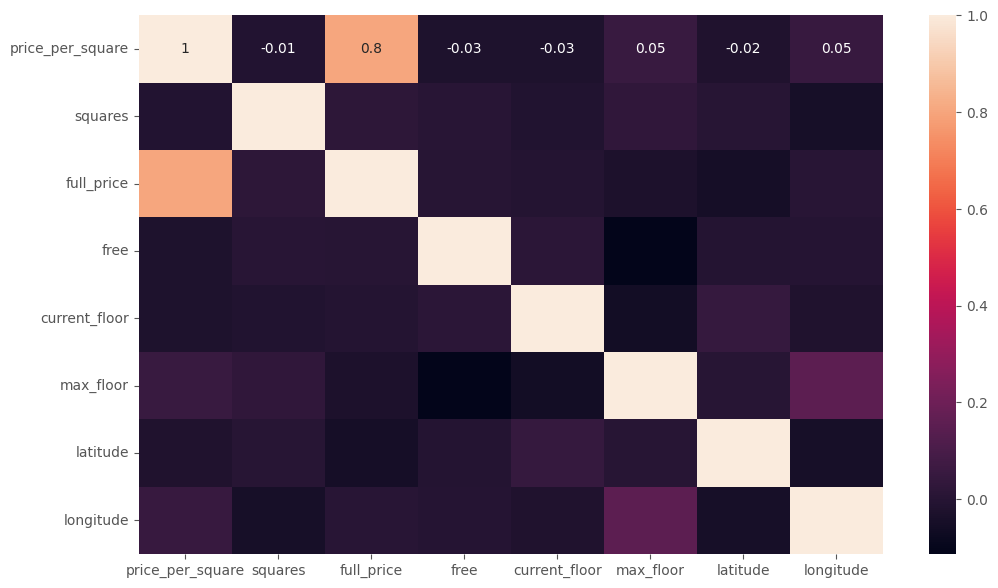

In [15]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(),annot = True, fmt='.1g')
plt.show()